In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

In [2]:
df = pd.read_csv('marketing_campaign.csv',sep='\t')

In [3]:
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012       58       635  ...                  7   
1            1  08-03-2014       38        11  ...                  5   
2            0  21-08-2013       26       426  ...                  4   
3            0  10-02-2014       26        11  ...                  6   
4            0  19-01-2014       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  13-06-2013       46       709  ...                  5   
2236         1  10-06-2014       56       406  ...                  7   
2237         0  25-01-2014       91       908  ...                  6   
2238         1  24-01-2014        8       428  ...                  3   
2239         1  15-10-2012       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 29 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df = df.dropna()

In [6]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

C:\Users\19517476\AppData\Local\Temp/ipykernel_17144/177162232.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])


In [7]:
print("Первый клиент совершил первую покупку: ",df.Dt_Customer.min())
print("Последний клиент совершил первую покупку: ",df.Dt_Customer.max())

Первый клиент совершил первую покупку:  2012-01-08 00:00:00
Последний клиент совершил первую покупку:  2014-12-06 00:00:00


In [8]:
df['Lifetime']=[(df.Dt_Customer.max()-i).days for i in df.Dt_Customer]

C:\Users\19517476\AppData\Local\Temp/ipykernel_17144/3879476118.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Lifetime']=[(df.Dt_Customer.max()-i).days for i in df.Dt_Customer]


In [9]:
df['Age'] = 2015 - df.Year_Birth

C:\Users\19517476\AppData\Local\Temp/ipykernel_17144/2968139724.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = 2015 - df.Year_Birth


In [10]:
df["Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

C:\Users\19517476\AppData\Local\Temp/ipykernel_17144/3397200485.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]


In [11]:
df["Marital_Status"]=df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

C:\Users\19517476\AppData\Local\Temp/ipykernel_17144/640201636.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Marital_Status"]=df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})


In [12]:
df["Children"]=df["Kidhome"]+df["Teenhome"]
df = df.drop(['Teenhome','Kidhome'],axis=1)

C:\Users\19517476\AppData\Local\Temp/ipykernel_17144/3442704912.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Children"]=df["Kidhome"]+df["Teenhome"]


In [13]:
df["Is_Parent"] = np.where(df.Children> 0, 1, 0)

In [14]:
df=df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

In [15]:
df.Education = df.Education.replace({'2n Cycle':'Master'})

In [16]:
to_drop = ["Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
df = df.drop(to_drop, axis=1)

In [17]:
df.describe()

Income      Recency        Wines       Fruits         Meat  \
count    2216.000000  2216.000000  2216.000000  2216.000000  2216.000000   
mean    52247.251354    49.012635   305.091606    26.356047   166.995939   
std     25173.076661    28.948352   337.327920    39.793917   224.283273   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35303.000000    24.000000    24.000000     2.000000    16.000000   
50%     51381.500000    49.000000   174.500000     8.000000    68.000000   
75%     68522.000000    74.000000   505.000000    33.000000   232.250000   
max    666666.000000    99.000000  1493.000000   199.000000  1725.000000   

              Fish       Sweets         Gold  NumDealsPurchases  \
count  2216.000000  2216.000000  2216.000000        2216.000000   
mean     37.637635    27.028881    43.965253           2.323556   
std      54.752082    41.072046    51.815414           1.923716   
min       0.000000     0.000000     0.000000           0.000000   
25%       3.000000     1.000000     9.000000           1.000000   
50%      12.000000     8.000000    24.500000           2.000000   
75%      50.000000    33.000000    56.000000           3.000000   
max     259.000000   262.000000   321.000000          15.000000   

       NumWebPurchases  ...  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
count      2216.000000  ...   2216.000000   2216.000000   2216.000000   
mean          4.085289  ...      0.073105      0.064079      0.013538   
std           2.740951  ...      0.260367      0.244950      0.115588   
min           0.000000  ...      0.000000      0.000000      0.000000   
25%           2.000000  ...      0.000000      0.000000      0.000000   
50%           4.000000  ...      0.000000      0.000000      0.000000   
75%           6.000000  ...      0.000000      0.000000      0.000000   
max          27.000000  ...      1.000000      1.000000      1.000000   

          Complain     Response     Lifetime          Age        Spent  \
count  2216.000000  2216.000000  2216.000000  2216.000000  2216.000000   
mean      0.009477     0.150271   512.006318    46.179603   607.075361   
std       0.096907     0.357417   232.469034    11.985554   602.900476   
min       0.000000     0.000000     0.000000    19.000000     5.000000   
25%       0.000000     0.000000   340.000000    38.000000    69.000000   
50%       0.000000     0.000000   513.000000    45.000000   396.500000   
75%       0.000000     0.000000   686.000000    56.000000  1048.000000   
max       1.000000     1.000000  1063.000000   122.000000  2525.000000   

          Children    Is_Parent  
count  2216.000000  2216.000000  
mean      0.947202     0.714350  
std       0.749062     0.451825  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       1.000000     1.000000  
75%       1.000000     1.000000  
max       3.000000     1.000000  

[8 rows x 25 columns]

<Figure size 576x396 with 0 Axes>

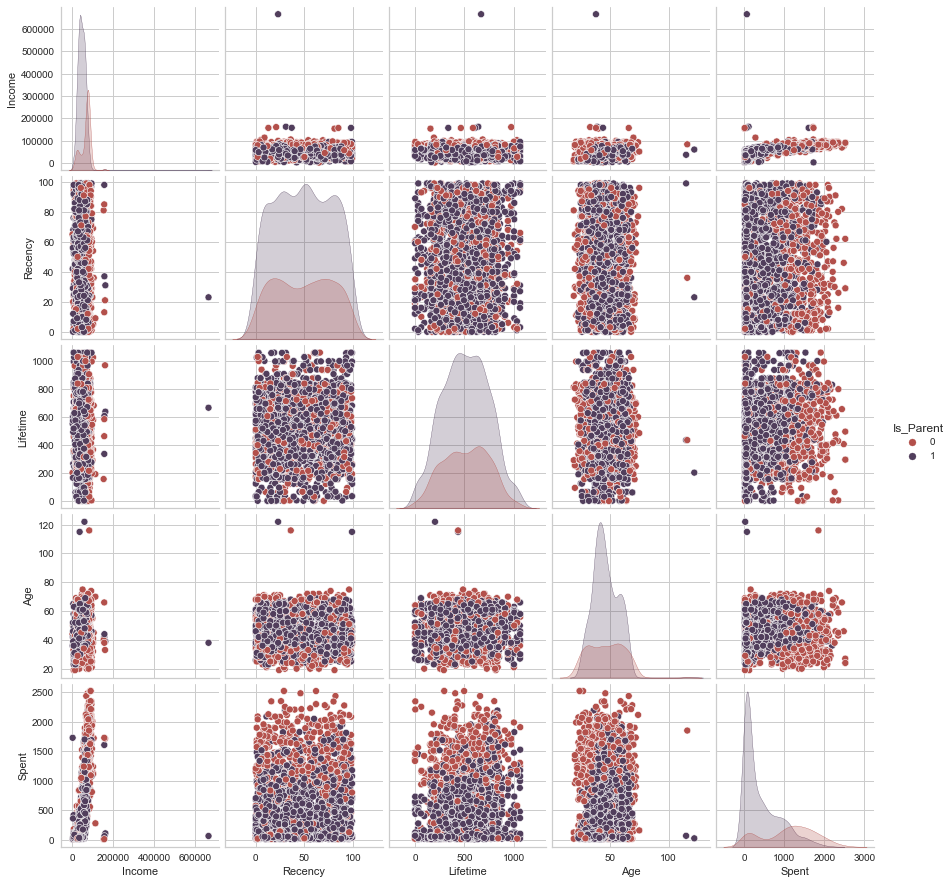

In [18]:
pal = ['#aec086','#b9c5c7','#d7d2cc','#a08c7d','#b3504b','#513e5c']
To_Plot = [ "Income", "Recency", "Lifetime", "Age", "Spent", "Is_Parent"]
plt.figure()
sns.pairplot(df[To_Plot],hue='Is_Parent',palette=pal[-2:])
plt.show()

In [19]:
df = df[df.Income<600000]
df = df[df.Age<90]
df["Spent"] = df[['Wines','Meat','Fish','Sweets','Gold']].sum(axis=1)

<Figure size 576x396 with 0 Axes>

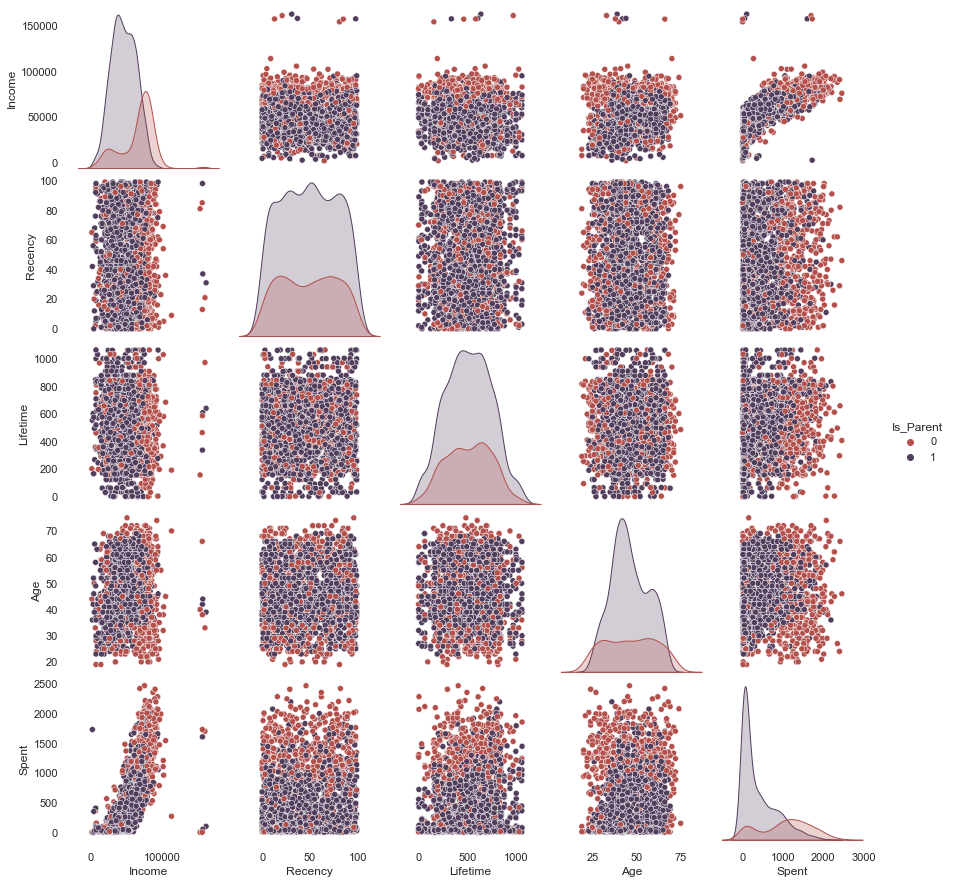

In [52]:
pal = ['#aec086','#b9c5c7','#d7d2cc','#a08c7d','#b3504b','#513e5c']
To_Plot = [ "Income", "Recency", "Lifetime", "Age", "Spent", "Is_Parent"]
plt.figure()
sns.pairplot(df[To_Plot],hue='Is_Parent',palette=pal[-2:])
plt.show()

In [21]:
import plotly.express as px

wide_df = df.groupby('Education')['Education','Spent','Wines','Meat','Fish','Sweets','Gold'].sum().reset_index()
wide_df=wide_df.set_index('Education')
for i in wide_df.index:
    wide_df.loc[i]=wide_df.loc[i]/wide_df.loc[i].Spent
wide_df = wide_df.reset_index()

fig = px.bar(wide_df, x="Education", y=['Wines','Meat','Fish','Sweets','Gold'], title="График")
fig.show()

C:\Users\19517476\AppData\Local\Temp/ipykernel_17144/2606284511.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  wide_df = df.groupby('Education')['Education','Spent','Wines','Meat','Fish','Sweets','Gold'].sum().reset_index()


In [22]:
wide_df = df.groupby('Marital_Status')['Marital_Status','Spent','Wines','Meat','Fish','Sweets','Gold'].sum().reset_index()
wide_df=wide_df.set_index('Marital_Status')
for i in wide_df.index:
    wide_df.loc[i]=wide_df.loc[i]/wide_df.loc[i].Spent
wide_df = wide_df.reset_index()

fig = px.bar(wide_df, x="Marital_Status", y=['Wines','Meat','Fish','Sweets','Gold'], title="График")
fig.show()

C:\Users\19517476\AppData\Local\Temp/ipykernel_17144/1055499686.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [23]:
wide_df = df.groupby('Is_Parent')['Is_Parent','Spent','Wines','Meat','Fish','Sweets','Gold'].sum().reset_index(drop=True)
wide_df=wide_df.set_index('Is_Parent')
for i in wide_df.index:
    wide_df.loc[i]=wide_df.loc[i]/wide_df.loc[i].Spent
wide_df = wide_df.reset_index()

fig = px.bar(wide_df, x="Is_Parent", y=['Wines','Meat','Fish','Sweets','Gold'], title="График")
fig.show()

C:\Users\19517476\AppData\Local\Temp/ipykernel_17144/2879574896.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [26]:
import plotly.graph_objects as go
y = 'Spent'
factor =  'Education'
color_list = ['#aec086','#b9c5c7','#d7d2cc','#a08c7d','#b3504b','#513e5c']
fig = go.Figure(data = [go.Box(y=df[y][df[factor] == f[0]], name=str(f[0]),
                marker_color = f[1]) for f in zip(df[factor].unique(),color_list)],
                layout=go.Layout(
        title=go.layout.Title(text=y)
    ))
fig.show()

In [27]:
y = 'Spent'
factor =  'Is_Parent'

fig = go.Figure(data = [go.Box(y=df[y][df[factor] == f[0]], name=str(f[0]),
                marker_color = f[1]) for f in zip(df[factor].unique(),color_list)],
                layout=go.Layout(
        title=go.layout.Title(text=y)
    ))
fig.show()

In [28]:
y = 'Spent'
factor =  'Marital_Status'

fig = go.Figure(data = [go.Box(y=df[y][df[factor] == f[0]], name=str(f[0]),
                marker_color = f[1]) for f in zip(df[factor].unique(),color_list)],
                layout=go.Layout(
        title=go.layout.Title(text=y)
    ))
fig.show()

In [29]:
y = 'Income'
factor =  'Education'

fig = go.Figure(data = [go.Box(y=df[y][df[factor] == f[0]], name=str(f[0]),
                marker_color = f[1]) for f in zip(df[factor].unique(),color_list)],
                layout=go.Layout(
        title=go.layout.Title(text=y)
    ))
fig.show()

In [30]:
y = 'Income'
factor =  'Is_Parent'

fig = go.Figure(data = [go.Box(y=df[y][df[factor] == f[0]], name=str(f[0]),
                marker_color = f[1]) for f in zip(df[factor].unique(),color_list)],
                layout=go.Layout(
        title=go.layout.Title(text=y)
    ))
fig.show()

In [31]:
y = 'Income'
factor =  'Marital_Status'

fig = go.Figure(data = [go.Box(y=df[y][df[factor] == f[0]], name=str(f[0]),
                marker_color = f[1]) for f in zip(df[factor].unique(),color_list)],
                layout=go.Layout(
        title=go.layout.Title(text=y)
    ))
fig.show()

In [32]:
qunt_features = ['Income','Recency','Wines','Fruits','Sweets','Gold','NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth','Lifetime','Age','Spent','Children']

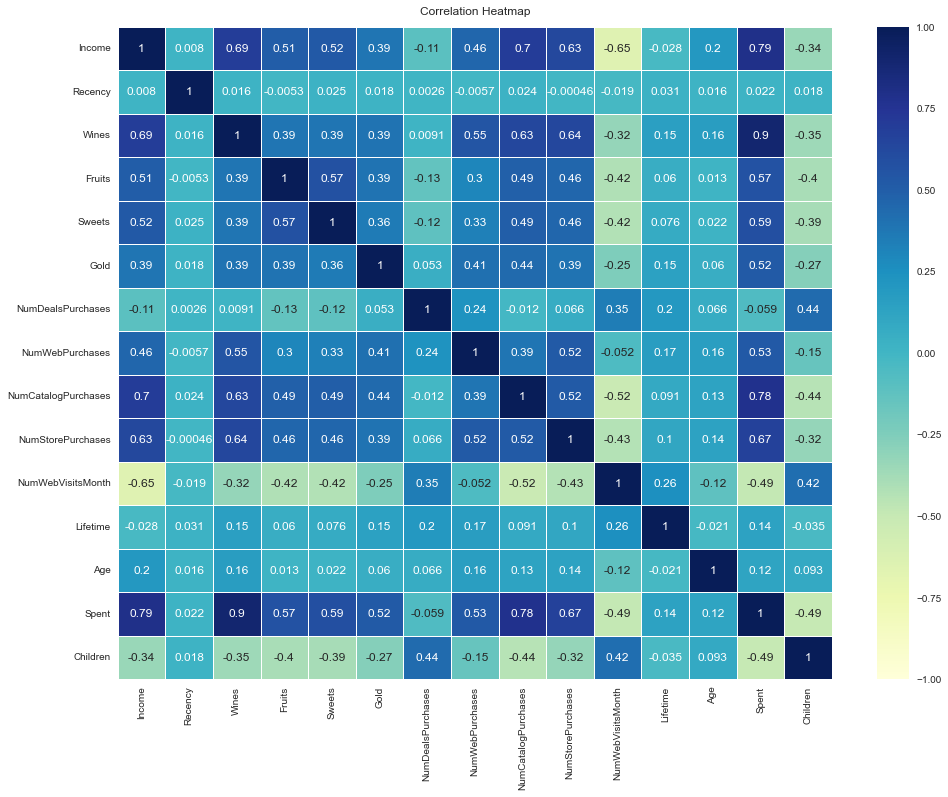

In [33]:
plt.figure(figsize=(16, 12))
heatmap = sns.heatmap(df[qunt_features].corr(), vmin=-1, vmax=1, annot=True,cmap='YlGnBu', center= 0, linewidths=1, linecolor='white')
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [34]:
object_cols = df.dtypes.index[df.dtypes == 'object']
LE=LabelEncoder()
for i in object_cols:
    df[i]=df[[i]].apply(LE.fit_transform)

In [38]:
df0 = df.drop(['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response'],axis=1)
#Scaling
scaled = StandardScaler()
scaled_df = pd.DataFrame(scaled.fit_transform(df0))

In [39]:
pca = PCA(n_components=3)
pca.fit(scaled_df)
PCA_df = pd.DataFrame(pca.transform(scaled_df), columns=(["col1","col2", "col3"]))
PCA_df.describe().T

count          mean       std       min       25%       50%       75%  \
col1  2212.0  0.000000e+00  2.720446 -5.441249 -2.451167 -0.823571  2.320532   
col2  2212.0  2.248553e-17  1.457367 -3.770408 -1.021896 -0.238331  0.939384   
col3  2212.0  4.015273e-17  1.192591 -3.615404 -0.786612  0.026442  0.795952   

           max  
col1  7.509832  
col2  5.751823  
col3  4.671687

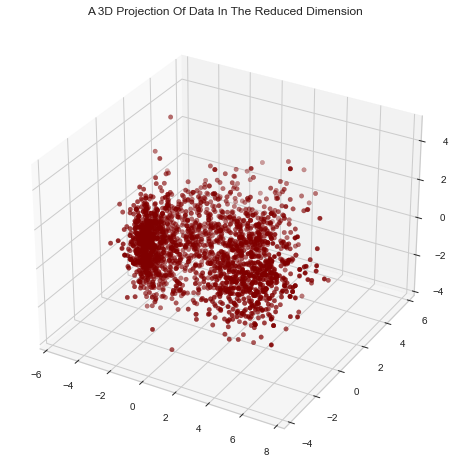

In [40]:
x =PCA_df["col1"]
y =PCA_df["col2"]
z =PCA_df["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

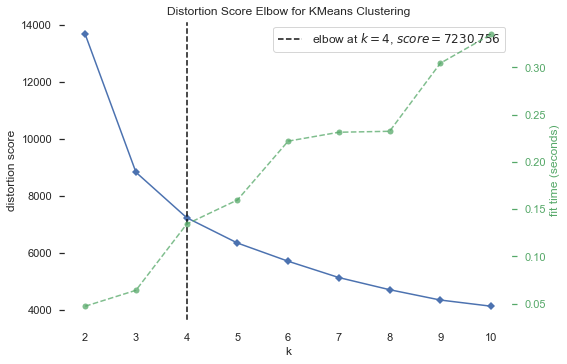

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [48]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_df)
Elbow_M.show()

In [49]:
AC = AgglomerativeClustering(n_clusters=4)
yhat_AC = AC.fit_predict(PCA_df)
PCA_df["Clusters"] = yhat_AC
df["Clusters"]= yhat_AC

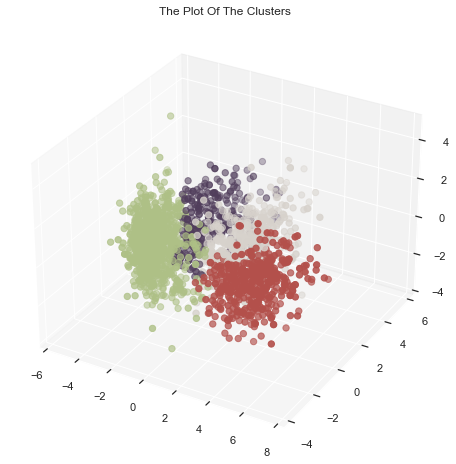

In [50]:

from matplotlib import colors
cmap = colors.ListedColormap(pal)
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_df["Clusters"], marker='o',cmap = cmap)
ax.set_title("The Plot Of The Clusters")
plt.show()

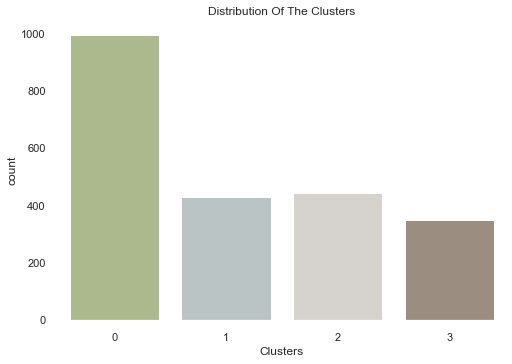

In [53]:
pl = sns.countplot(x=df["Clusters"], palette= pal[:4])
pl.set_title("Distribution Of The Clusters")
plt.show()

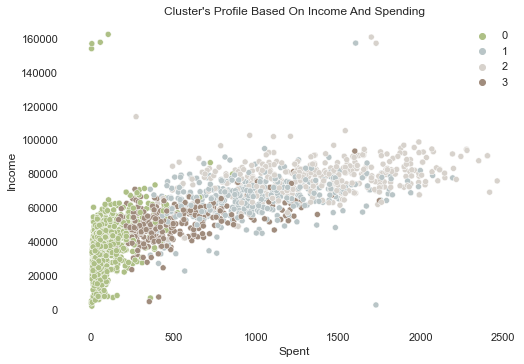

In [54]:
pl = sns.scatterplot(data = df,x=df["Spent"], y=df["Income"],hue=df["Clusters"], palette= pal[:4])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

In [55]:
wide_df = df.groupby('Clusters')['Spent','Wines','Meat','Fish','Sweets','Gold'].sum().reset_index()
wide_df=wide_df.set_index('Clusters')
for i in wide_df.index:
    wide_df.loc[i]=wide_df.loc[i]/wide_df.loc[i].Spent
wide_df = wide_df.reset_index()

fig = px.bar(wide_df, x="Clusters", y=['Wines','Meat','Fish','Sweets','Gold'], title="График")
fig.show()

C:\Users\19517476\AppData\Local\Temp/ipykernel_17144/3689742640.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [57]:
y = 'Income'
factor =  'Clusters'
fig = go.Figure(data = [go.Box(y=df[y][df[factor] == f[0]], name=str(f[0]),
                marker_color = f[1]) for f in zip(df[factor].unique(),pal)],
                layout=go.Layout(
        title=go.layout.Title(text=y)
    ))
fig.show()

In [56]:
y = 'Spent'
factor =  'Clusters'
colors = ['#aec086','#b9c5c7','#d7d2cc','#a08c7d','#b3504b','#513e5c']
fig = go.Figure(data = [go.Box(y=df[y][df[factor] == f[0]], name=str(f[0]),
                marker_color = f[1]) for f in zip(df[factor].unique(),pal)],
                layout=go.Layout(
        title=go.layout.Title(text=y)
    ))
fig.show()